In [1]:
from hyp_solver2 import HypProblem, Mesh, Solver
import matplotlib.pyplot as plt
import numpy as np

# Задача

In [2]:
x0 = lambda s: 0
y0 = lambda s: (3*s+1)/(2*(s+1))

x_an = lambda s, t: 2*(s**2+1)*np.sin(t)
y_an = lambda s, t: (3*s+1)/(2*(s+1))*np.cos(t)
T = [0, 0.41]
S = [0, 1]
C = [1,2]
# C = [2.3,0.9]

B11 = lambda s, t: -2*s
B12 = lambda s, t: 4/3*s**2
B21 = lambda s, t: - (3*s+1)/(4*(s**2+1)*(s+1))
B22 = lambda s, t: 4/((s+1)*(3*s+1))


G11 = lambda t: - 4*np.cos(t) / (np.cos(t)-4*np.sin(t))
G12 = lambda t: - G11(t)
G21 = lambda t: (np.sin(t)) / (np.cos(t) - 4* np.sin(t))
G22 = lambda t: - G21(t)

F1 = lambda s, t: 4*s**3*np.sin(t)+2*np.cos(t)+4*s**2*np.cos(t)/(3*(s+1))
F2 = lambda s, t: 0

hyp_problem = HypProblem(T=T, S=S, C=C, B=[[B11, B12], [B21, B22]], F=[F1, F2], G=[[G11, G12], [G21, G22]], X0=x0, Y0=y0)


# Сетка

In [3]:
mesh = Mesh(hyp_problem, 10)

# Решение прямой задачи

In [4]:
solver = Solver()
solver.solve_initial(mesh, hyp_problem)
solver.solver_center(mesh, hyp_problem)
solver.solver_final(mesh, hyp_problem)

Text(0, 0.5, 't')

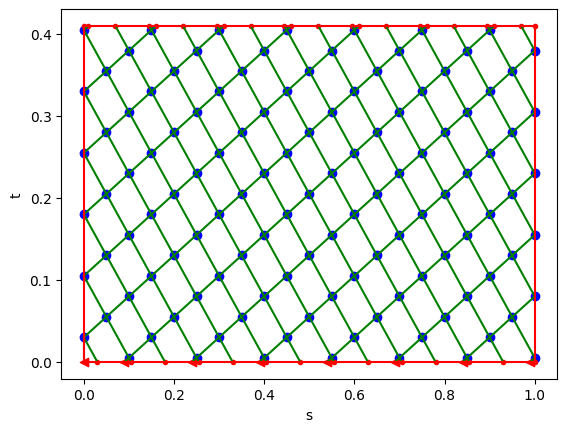

In [5]:
%matplotlib inline

for node in mesh.nodes_center:
    i = int(node[0])
    j = int(node[1])
    s = node[2]
    t = node[3]
    if mesh.is_from_center(i, j-1):
        s_, t_, _, _ = mesh.get_center_node_stxy(i, j-1)
        plt.plot([s,s_], [t, t_], "g" )
    if mesh.is_from_center(i+1, j):
        s_, t_, _, _ = mesh.get_center_node_stxy(i+1, j)
        plt.plot([s,s_], [t, t_], "g")
    plt.scatter(x=s, y=t, color="b")

for node in mesh.nodes_final_l:
    i = int(node[0])
    j = int(node[1])
    s = node[2]
    t = node[3]
    
    s_, t_, _, _ = mesh.get_center_node_stxy(i, j)
    plt.plot([s,s_], [t, t_], "g")
    plt.scatter(s, t, color="r", marker=".")

for node in mesh.nodes_final_r:
    i = int(node[0])
    j = int(node[1])
    s = node[2]
    t = node[3]
    
    s_, t_, _, _ = mesh.get_center_node_stxy(i, j)
    plt.plot([s,s_], [t, t_], "g")
    plt.scatter(node[2], node[3], color="r", marker=".")
    
for node in mesh.nodes_start_l:
    i = int(node[0])
    j = int(node[1])
    s = node[2]
    t = node[3]
    node, _ = mesh.get_center_node(i, j)
    plt.plot([s,node[2]], [t, node[3]], "g")
    plt.scatter(s, t, color="r", marker="<")

for node in mesh.nodes_start_r:
    i = int(node[0])
    j = int(node[1])
    s = node[2]
    t = node[3]
    node, _ = mesh.get_center_node(i, j)
    plt.plot([s,node[2]], [t, node[3]], "g")
    plt.scatter(s, t, color="r", marker=".")


plt.plot([hyp_problem.S0, hyp_problem.S1], [hyp_problem.T0, hyp_problem.T0], "r")
plt.plot([hyp_problem.S0, hyp_problem.S1], [hyp_problem.T1, hyp_problem.T1], "r")
plt.plot([hyp_problem.S0, hyp_problem.S0], [hyp_problem.T0, hyp_problem.T1], "r")
plt.plot([hyp_problem.S1, hyp_problem.S1], [hyp_problem.T0, hyp_problem.T1], "r")


plt.xlabel("s")
plt.ylabel("t")

In [6]:
point_x = []
point_y = []
point_x_an = []
point_y_an = []
for cord, rez in zip(mesh.nodes_start_l, mesh.rez_nodes_start_l):
    s = cord[2]
    t = cord[3]
    x = rez[0][0]
    y = rez[0][1]
    point_x.append([s, t, x])
    point_x_an.append([s, t, x_an(s, t)])
    point_y.append([s, t, y])
    point_y_an.append([s, t, y_an(s, t)])
    

for cord, rez in zip(mesh.nodes_start_r, mesh.rez_nodes_start_r):
    s = cord[2]
    t = cord[3]
    x = rez[0][0]
    y = rez[0][1]
    point_x.append([s, t, x])
    point_x_an.append([s, t, x_an(s, t)])
    point_y.append([s, t, y])
    point_y_an.append([s, t, y_an(s, t)])

for cord, rez in zip(mesh.nodes_center, mesh.rez_nodes_center):
    s = cord[2]
    t = cord[3]
    x = rez[0][0]
    y = rez[0][1]
    point_x.append([s, t, x])
    point_x_an.append([s, t, x_an(s, t)])
    point_y.append([s, t, y])
    point_y_an.append([s, t, y_an(s, t)])

deltas_x = []
deltas_y = []
for cord, rez in zip(mesh.nodes_final_r.tolist()+mesh.nodes_final_l.tolist(), mesh.rez_nodes_final_r+mesh.rez_nodes_final_l):
    s = cord[2]
    t = cord[3]
    x = rez[0][0]
    y = rez[0][1]
    deltas_x.append(abs(x-x_an(s,t)) if x is not None else 0 )
    deltas_y.append(abs(y-y_an(s,t)) if y is not None else 0)
    point_x.append([s, t, x])
    point_x_an.append([s, t, x_an(s, t)])
    point_y.append([s, t, y])
    point_y_an.append([s, t, y_an(s, t)])
print(f"dx:{np.max(deltas_x)}\ndy:{np.max(deltas_y)}")





dx:0.001350596179743535
dy:0.0007773133029538304


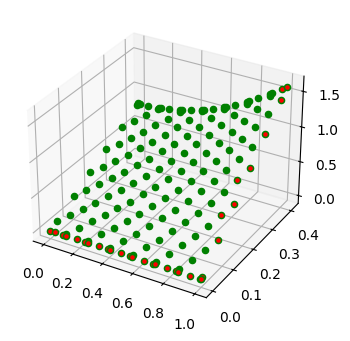

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')
for x, x_a in zip(point_x, point_x_an):
    if x[2] is not None:
        ax.scatter(x[0], x[1], x[2], color="g")
    ax.scatter(x_a[0], x_a[1], x_a[2], color="r", marker=".")
plt.show()

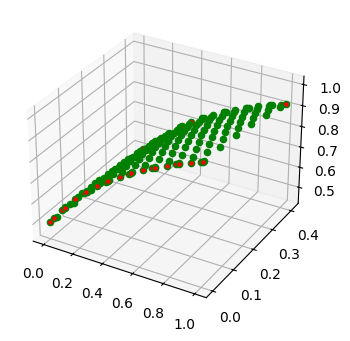

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')
for y, y_a in zip(point_y, point_y_an):
    if y[2] is not None:
        ax.scatter(y[0], y[1], y[2], color="g")
    ax.scatter(y_a[0], y_a[1], y_a[2], color="r", marker=".")
plt.show()

In [9]:
s_ar, x_ar, y_ar, x_an_ar, y_an_ar = [],[],[],[], []
for cord, rez in zip(mesh.nodes_final_l.tolist()+mesh.nodes_final_r.tolist(), 
                     mesh.rez_nodes_final_l+mesh.rez_nodes_final_r):
    s = cord[2]
    t = cord[3]
    x = rez[0][0]
    y = rez[0][1]
    
    s_ar.append(s)
    x_ar.append(x)
    y_ar.append(y) 
    x_an_ar.append(x_an(s, t))
    y_an_ar.append(y_an(s, t))
   

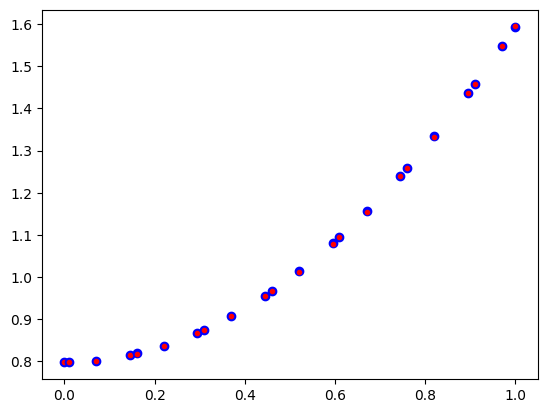

In [10]:
for s, x1, x2 in zip(s_ar, x_ar, x_an_ar):
    plt.scatter(s, x1, color="b")
    plt.scatter(s, x2, color="r", marker=".")

(0.0, 1.0)

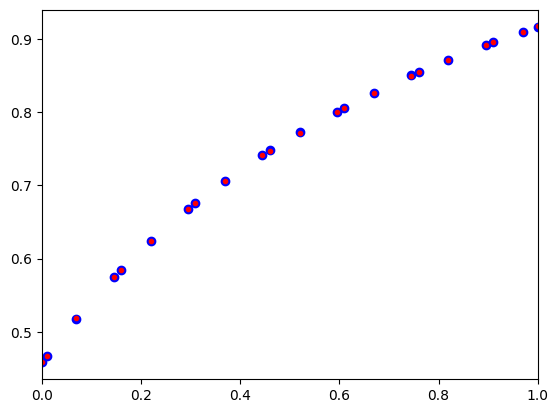

In [11]:
for s, y1, y2 in zip(s_ar, y_ar, y_an_ar):
    plt.scatter(s, y1, color="b")
    plt.scatter(s, y=y2, color="r", marker=".")

plt.xlim([0, 1])

# Сопряженная задача

In [12]:
from hyp_solver2 import HypProblem, Mesh, Solver
import matplotlib.pyplot as plt
import numpy as np

In [13]:
x0 = lambda s: 0
y0 = lambda s: 0


T = [0, 4]
S = [0, 2]
C = [1,3]
# C = [2.3,0.9]

psi1_an = lambda s, t: np.exp(s)*(T[1]-t)*np.cos(T[1]-t)
psi2_an = lambda s, t: (s+2)*np.sin(T[1]-t)
p1_an = lambda t: C[1]*(S[1]+2)*np.sin(T[1]-t)
p2_an = lambda t: C[0]*np.exp(S[0])*(T[1]-t)*np.cos(T[1]-t)

B11 = lambda s, t: C[0]
B12 = lambda s, t: 1/np.exp(s)
B21 = lambda s, t: - np.exp(s)*(T[1]-t)/(s+2)
B22 = lambda s, t: -C[1]/(s+2)


G11 = lambda t: 1
G12 = lambda t: - G11(t)
G21 = lambda t: -1.
G22 = lambda t: - G21(t)


# Незабыть убрать из итоговых методов все что связано с F1, F2
F1 = lambda s, t: -np.exp(s)*np.cos(T[1]-t)
F2 = lambda s, t: (T[1]-t)*np.cos(T[1]-t)-(s+2)*np.cos(T[1]-t)
Phi1 = lambda t: - C[1]*(S[1]+2)*np.sin(T[1]-t)+np.cos(T[1]-t)*(C[0]*np.exp(S[1])*(T[1]-t)- C[1]*(S[1]+2))
Phi2 = lambda t: - C[0]*np.cos(T[1]-t)*(1+T[1]-t)+np.sin(T[1]-t)*(C[0]*np.exp(S[0])*(T[1]-t)+ C[1]*(S[0]+2))

hyp_problem = HypProblem(T=T, S=S, C=C, B=[[B11, B12], [B21, B22]], F=[F1, F2], G=[[G11, G12], [G21, G22]], X0=x0, Y0=y0)
hyp_problem.Phi1 = Phi1
hyp_problem.Phi2 = Phi2

In [14]:
mesh = Mesh(hyp_problem, 10)

In [15]:
# %matplotlib inline

# for node in mesh.nodes_center:
#     i = int(node[0])
#     j = int(node[1])
#     s = node[2]
#     t = node[3]
#     if mesh.is_from_center(i, j-1):
#         s_, t_, _, _ = mesh.get_center_node_stxy(i, j-1)
#         plt.plot([s,s_], [t, t_], "g" )
#     if mesh.is_from_center(i+1, j):
#         s_, t_, _, _ = mesh.get_center_node_stxy(i+1, j)
#         plt.plot([s,s_], [t, t_], "g")
#     plt.scatter(x=s, y=t, color="b")

# for node in mesh.nodes_final_l:
#     i = int(node[0])
#     j = int(node[1])
#     s = node[2]
#     t = node[3]
    
#     s_, t_, _, _ = mesh.get_center_node_stxy(i, j)
#     plt.plot([s,s_], [t, t_], "g")
#     plt.scatter(s, t, color="r", marker=".")

# for node in mesh.nodes_final_r:
#     i = int(node[0])
#     j = int(node[1])
#     s = node[2]
#     t = node[3]
    
#     s_, t_, _, _ = mesh.get_center_node_stxy(i, j)
#     plt.plot([s,s_], [t, t_], "g")
#     plt.scatter(node[2], node[3], color="r", marker=".")
    
# for node in mesh.nodes_start_l:
#     i = int(node[0])
#     j = int(node[1])
#     s = node[2]
#     t = node[3]
#     node, _ = mesh.get_center_node(i, j)
#     plt.plot([s,node[2]], [t, node[3]], "g")
#     plt.scatter(s, t, color="r", marker=".")

# for node in mesh.nodes_start_r:
#     i = int(node[0])
#     j = int(node[1])
#     s = node[2]
#     t = node[3]
#     node, _ = mesh.get_center_node(i, j)
#     plt.plot([s,node[2]], [t, node[3]], "g")
#     plt.scatter(s, t, color="r", marker=".")


# plt.plot([hyp_problem.S0, hyp_problem.S1], [hyp_problem.T0, hyp_problem.T0], "r")
# plt.plot([hyp_problem.S0, hyp_problem.S1], [hyp_problem.T1, hyp_problem.T1], "r")
# plt.plot([hyp_problem.S0, hyp_problem.S0], [hyp_problem.T0, hyp_problem.T1], "r")
# plt.plot([hyp_problem.S1, hyp_problem.S1], [hyp_problem.T0, hyp_problem.T1], "r")


# plt.xlabel("s")
# plt.ylabel("t")

In [16]:
solver = Solver()

In [17]:
solver.solver_initial_conj(mesh, hyp_problem)
solver.solver_center_conj(mesh, hyp_problem)
solver.solver_final_conj(mesh, hyp_problem)

In [18]:
point_psi1 = []
point_psi2 = []
point_psi1_an = []
point_psi2_an = []
for cord, rez in zip(mesh.nodes_final_l, mesh.rez_nodes_final_l):
    s = cord[2]
    t = cord[3]
    psi1 = rez[1][0]
    psi2 = rez[1][1]
    point_psi1.append([s, t, psi1])
    point_psi1_an.append([s, t, psi1_an(s, t)])
    point_psi2.append([s, t, psi2])
    point_psi2_an.append([s, t, psi2_an(s, t)])

for cord, rez in zip(mesh.nodes_final_r, mesh.rez_nodes_final_r):
    s = cord[2]
    t = cord[3]
    psi1 = rez[1][0]
    psi2 = rez[1][1]
    point_psi1.append([s, t, psi1])
    point_psi1_an.append([s, t, psi1_an(s, t)])
    point_psi2.append([s, t, psi2])
    point_psi2_an.append([s, t, psi2_an(s, t)])


for cord, rez in zip(mesh.nodes_center, mesh.rez_nodes_center):
    s = cord[2]
    t = cord[3]
    psi1 = rez[1][0]
    psi2 = rez[1][1]
    point_psi1.append([s, t, psi1])
    point_psi1_an.append([s, t, psi1_an(s, t)])
    point_psi2.append([s, t, psi2])
    point_psi2_an.append([s, t, psi2_an(s, t)])

for cord, rez in zip(mesh.nodes_start_r, mesh.rez_nodes_start_r):
    s = cord[2]
    t = cord[3]
    psi1 = rez[1][0]
    psi2 = rez[1][1]
    point_psi1.append([s, t, psi1])
    point_psi1_an.append([s, t, psi1_an(s, t)])
    point_psi2.append([s, t, psi2])
    point_psi2_an.append([s, t, psi2_an(s, t)])

for cord, rez in zip(mesh.nodes_start_l, mesh.rez_nodes_start_l):
    s = cord[2]
    t = cord[3]
    psi1 = rez[1][0]
    psi2 = rez[1][1]
    point_psi1.append([s, t, psi1])
    point_psi1_an.append([s, t, psi1_an(s, t)])
    point_psi2.append([s, t, psi2])
    point_psi2_an.append([s, t, psi2_an(s, t)])

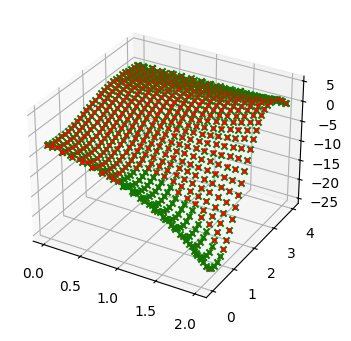

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')
for x, x_a in zip(point_psi1, point_psi1_an):
    if x[2] is not None:
        ax.scatter(x[0], x[1], x[2], color="g", marker="x")
    ax.scatter(x_a[0], x_a[1], x_a[2], color="r", marker=".")
# ax.view_init(150, -30, 180)
plt.show()

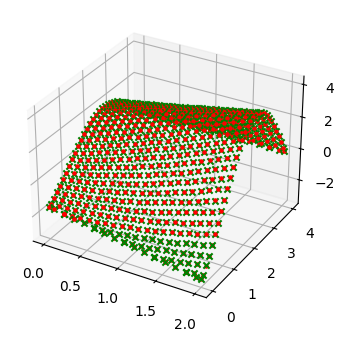

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')
for x, x_a in zip(point_psi2, point_psi2_an):
    if x[2] is not None:
        ax.scatter(x[0], x[1], x[2], color="g", marker="x")
    ax.scatter(x_a[0], x_a[1], x_a[2], color="r", marker=".")
plt.show()

In [21]:
s_ar, psi1_ar, psi2_ar, psi1_an_ar, psi2_an_ar = [],[],[],[], []
for cord, rez in zip(mesh.nodes_start_l.tolist()+mesh.nodes_start_r.tolist(), 
                     mesh.rez_nodes_start_l+mesh.rez_nodes_start_r):
    s = cord[2]
    t = cord[3]
    psi1 = rez[1][0]
    psi2 = rez[1][1]
    
    s_ar.append(s)
    psi1_ar.append(psi1)
    psi2_ar.append(psi2) 
    psi1_an_ar.append(psi1_an(s, t))
    psi2_an_ar.append(psi2_an(s, t))
   

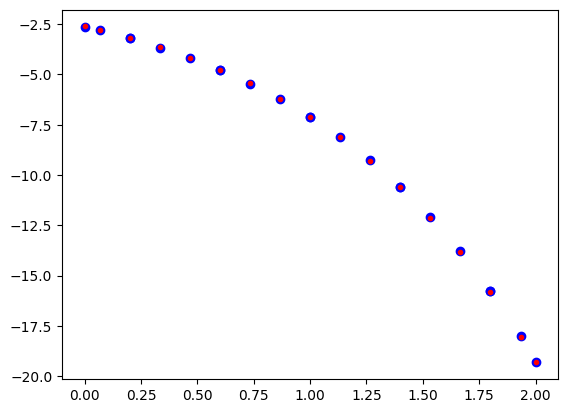

In [22]:
for s, x1, x2 in zip(s_ar, psi1_ar, psi1_an_ar):
    plt.scatter(s, x1, color="b")
    plt.scatter(s, x2, color="r", marker=".")

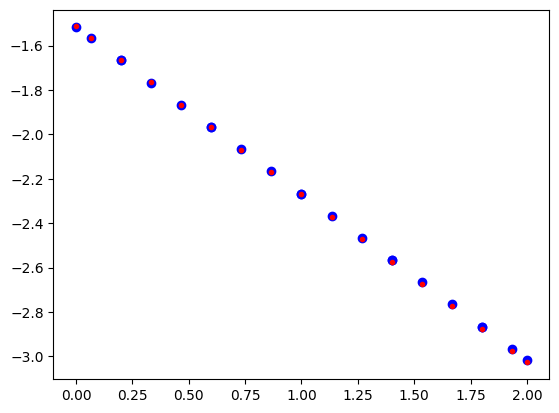

In [23]:
for s, x1, x2 in zip(s_ar, psi2_ar, psi2_an_ar):
    plt.scatter(s, x1, color="b")
    plt.scatter(s, x2, color="r", marker=".")

In [24]:
delta_psi1 = [abs(x1-x2) for x1, x2 in zip(psi1_ar, psi1_an_ar)]
delta_psi2 = [abs(x1-x2) for x1, x2 in zip(psi2_ar, psi2_an_ar)]

print(f"dx:{np.max(delta_psi1)}\ndy:{np.max(delta_psi2)}")

dx:0.06582125673832095
dy:0.010616420676883287


In [38]:
b = mesh.get_border(type_border="right", sort_t=True)

In [39]:
t = [bi[0][3] for bi in b]
# for bi in b:
#     print(bi[1])
p = [bi[1][1][2] for bi in b]

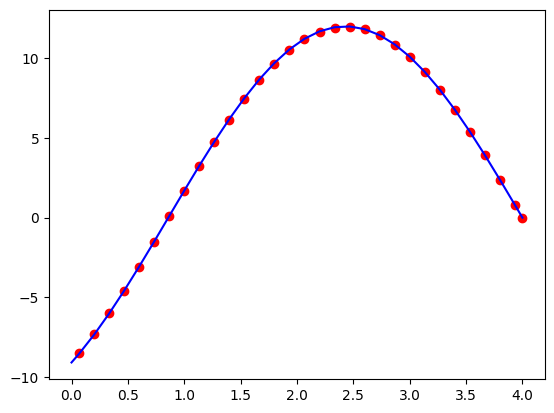

In [40]:
plt.plot(t, p, 'ro')
plt.plot(t, [p1_an(ti) for ti in t], 'b-')